## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_study_data["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study_data.loc[mouse_study_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(duplicates)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = mouse_study_data[mouse_study_data["Mouse ID"] == 'g989']
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study_data[mouse_study_data["Mouse ID"].isin(duplicates)==False]
clean_mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = len(clean_mouse_data["Mouse ID"].unique())
clean_number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_groups = clean_mouse_data.groupby("Drug Regimen")

tumor_volume_mean = drug_regimen_groups["Tumor Volume (mm3)"].mean()
tumor_volume_median = drug_regimen_groups["Tumor Volume (mm3)"].median()
tumor_volume_variance = drug_regimen_groups["Tumor Volume (mm3)"].var()
tumor_volume_stddev = drug_regimen_groups["Tumor Volume (mm3)"].std()
tumor_volume_sem = drug_regimen_groups["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({"Mean": tumor_volume_mean,  
                              "Median":tumor_volume_median, 
                              "Variance": tumor_volume_variance, 
                              "Std Dev": tumor_volume_stddev, 
                              "SEM": tumor_volume_sem})
summary_table


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_table = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

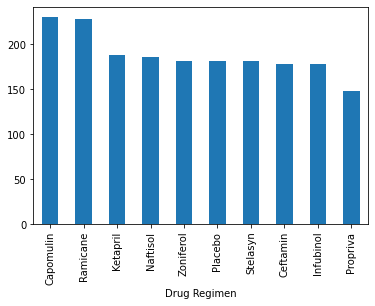

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = clean_mouse_data.groupby(["Drug Regimen"])["Timepoint"].count()
timepoints.sort_values(ascending=False).plot.bar()
plt.show()


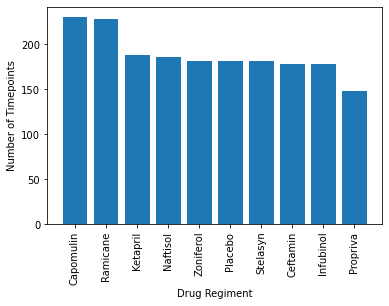

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_bar  = timepoints.sort_values(ascending=False)
plt.bar(timepoint_bar.index, timepoint_bar.values)
plt.ylabel('Number of Timepoints')
plt.xlabel('Drug Regiment')
plt.xticks(rotation = 'vertical')
plt.show()


<AxesSubplot:ylabel='Sex'>

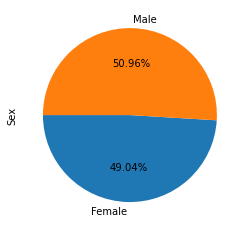

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_by_sex = clean_mouse_data.groupby(['Sex'])['Sex'].count()
mice_by_sex.plot.pie(autopct='%.2f%%', startangle = 180)



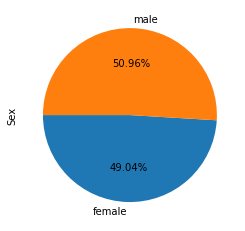

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_by_sex, labels=('female', 'male'), autopct='%.2f%%', startangle = 180)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = clean_mouse_data.groupby(["Mouse ID"])["Timepoint"].max()
last_time_df = pd.DataFrame(last_time)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = pd.merge(clean_mouse_data, last_time_df, on = ("Mouse ID", "Timepoint"), how='right')
last_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 

    
    # Determine outliers using upper and lower bounds


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,12.697581,26.116935,32.903226,54.968606,1.681452
std,7.224093,3.704472,15.495811,12.671479,1.328350
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,6.000000,25.000000,20.000000,45.875867,1.000000
50%,13.000000,27.000000,45.000000,55.793278,1.000000
75%,19.000000,29.000000,45.000000,65.053624,3.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
